Iteration 1, Training Loss: 9.9698, Validation Loss: 9.3808, Train Accuracy: 0.6909, Validation Accuracy: 0.6928
Iteration 2, Training Loss: 9.9673, Validation Loss: 9.3058, Train Accuracy: 0.6909, Validation Accuracy: 0.6928
Iteration 3, Training Loss: 9.9605, Validation Loss: 9.2319, Train Accuracy: 0.6927, Validation Accuracy: 0.6993
Iteration 4, Training Loss: 9.9524, Validation Loss: 9.1593, Train Accuracy: 0.6927, Validation Accuracy: 0.6993
Iteration 5, Training Loss: 9.9430, Validation Loss: 9.0880, Train Accuracy: 0.6927, Validation Accuracy: 0.6993
Iteration 6, Training Loss: 9.9297, Validation Loss: 9.0175, Train Accuracy: 0.6946, Validation Accuracy: 0.6993
Iteration 7, Training Loss: 9.9067, Validation Loss: 8.9477, Train Accuracy: 0.6946, Validation Accuracy: 0.6993
Iteration 8, Training Loss: 9.8788, Validation Loss: 8.8786, Train Accuracy: 0.6946, Validation Accuracy: 0.6993
Iteration 9, Training Loss: 9.8503, Validation Loss: 8.8106, Train Accuracy: 0.6946, Validation 

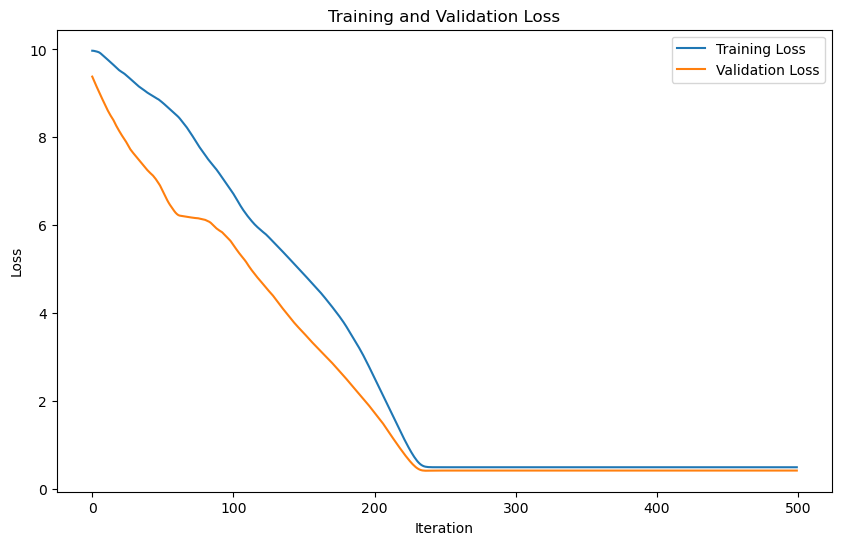

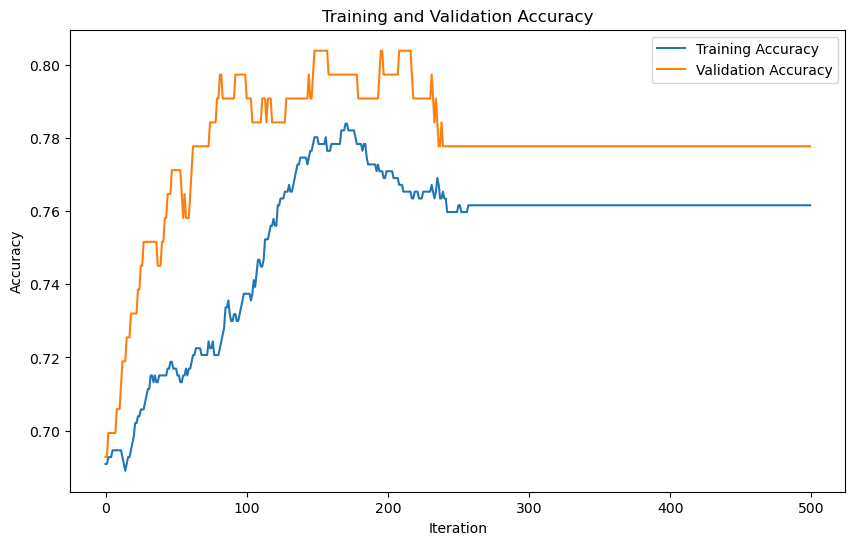

Confusion matrix: [[18, 13], [3, 44]]
Accuracy: 0.7948717948717948
Precision: 0.8571428571428571
Recall: 0.5806451612903226
F1 Score: 0.34615384615384615


In [1]:
#(a)Logistic regression with stochastic gradient descent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    @staticmethod
    def cross_entropy_loss(y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    def train(self, train_data, train_labels, val_data, val_labels):
        num_samples, num_features_with_bias = train_data.shape
        theta = np.random.rand(num_features_with_bias)*100

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0

            for i in range(num_samples):
                xi = train_data[i]
                yi = train_labels[i]

                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                gradient = (pred - yi) * xi

                theta -= self.learning_rate * gradient
                total_loss += self.cross_entropy_loss(yi, pred)

                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_train += 1

            avg_loss = total_loss / num_samples
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_samples
            train_accuracies.append(train_accuracy)

            # Evaluate the model on the validation set
            correct_val = 0
            val_loss = 0
            num_val = len(val_labels)
            for i in range(num_val):
                xi = val_data[i]
                yi = val_labels[i]

                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                val_loss += self.cross_entropy_loss(yi, pred)

                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1

            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)

            print(f"Iteration {epoch + 1}, Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                  f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        return theta, train_losses, val_losses, train_accuracies, val_accuracies

    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.sigmoid(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1


# Load the dataset
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
learning_rate = float(input("Learning rate: "))
iterations = 500

# Initialize the logistic regression model
logreg = LogisticRegression(learning_rate, iterations)

# Training
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logreg.train(train_data, train_labels, val_data, val_labels)

# Plot training loss vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_losses, label='Training Loss')
plt.plot(range(iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training accuracy vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Testing
test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logreg.test(test_data, test_labels, final_theta)

print('Confusion matrix:', confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', F1)


iteration 1, Loss: 10.3668, Validation Loss: 10.0942, Train Accuracy: 0.6089, Validation Accuracy: 0.6209
iteration 2, Loss: 10.3595, Validation Loss: 10.0855, Train Accuracy: 0.6089, Validation Accuracy: 0.6209
iteration 3, Loss: 10.3522, Validation Loss: 10.0769, Train Accuracy: 0.6089, Validation Accuracy: 0.6209
iteration 4, Loss: 10.3448, Validation Loss: 10.0685, Train Accuracy: 0.6127, Validation Accuracy: 0.6209
iteration 5, Loss: 10.3373, Validation Loss: 10.0602, Train Accuracy: 0.6127, Validation Accuracy: 0.6275
iteration 6, Loss: 10.3299, Validation Loss: 10.0519, Train Accuracy: 0.6127, Validation Accuracy: 0.6275
iteration 7, Loss: 10.3226, Validation Loss: 10.0438, Train Accuracy: 0.6145, Validation Accuracy: 0.6275
iteration 8, Loss: 10.3153, Validation Loss: 10.0358, Train Accuracy: 0.6145, Validation Accuracy: 0.6275
iteration 9, Loss: 10.3080, Validation Loss: 10.0279, Train Accuracy: 0.6145, Validation Accuracy: 0.6275
iteration 10, Loss: 10.3009, Validation Loss: 

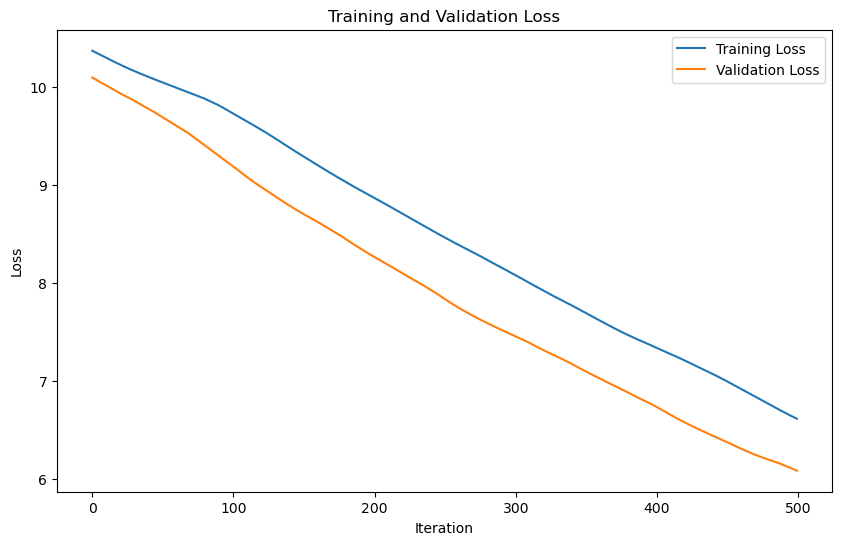

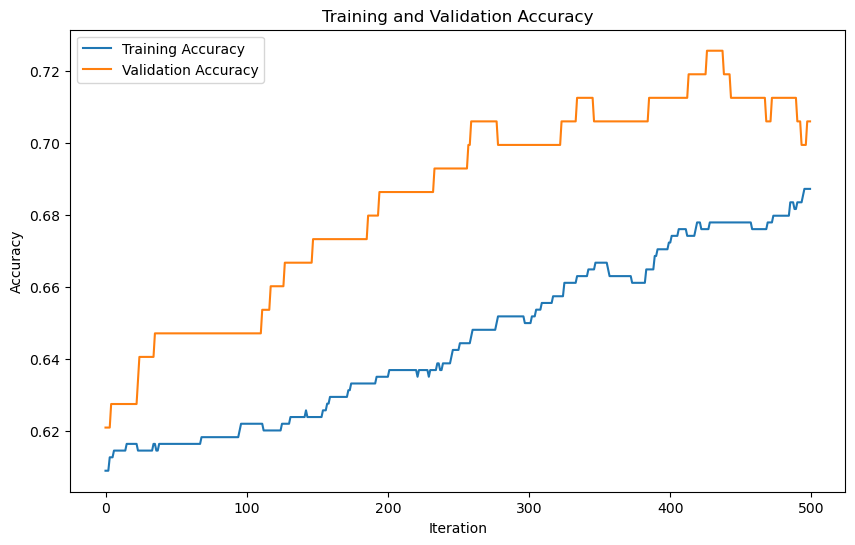

confusion matrix is:  [[24, 7], [21, 26]]
accuracy:  0.6410256410256411
precision:  0.5333333333333333
recall:  0.7741935483870968
F1 Score:  0.3157894736842105


In [1]:
#(d)Using lasso regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class LassoLogistic:
    def __init__(self,learning_rate,iterations,l1_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty
    def sigmoid(self,z):
        x = np.clip(z, -15, 15)
        return 1 / (1 + np.exp(-x))
    def lasso_loss(self,theta, X, y, penalty_strength):
        m = len(y)
        epsilon = 1e-15
        logits = np.dot(X, theta)
        predictions = self.sigmoid(logits)
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        lasso_term = penalty_strength * np.sum(abs(theta))  # lasso penalty term
        return loss + lasso_term
    def train(self, train_data, train_labels, val_data, val_labels):
        theta = np.random.rand(train_data.shape[1])*100
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0
            for i in range(len(train_data)):
                X_i = train_data[i:i+1]
                y_i = train_labels[i:i+1]
                
                logits = np.dot(X_i, theta)
                predictions = self.sigmoid(logits)
                gradient = np.dot(X_i.T, (predictions - y_i)) + self.l1_penalty * np.sign(theta)
                
                theta -= learning_rate * gradient
                total_loss += self.lasso_loss(theta,X_i,y_i,self.l1_penalty)
                if (predictions > 0.5 and y_i == 1) or (predictions <= 0.5 and y_i == 0):
                    correct_train += 1
            avg_loss = total_loss / num_train
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_train
            train_accuracies.append(train_accuracy)

            correct_val = 0
            val_loss = 0
            for i in range(num_val):
                xi = val_data[i:i+1]
                yi = val_labels[i:i+1]
                
                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                val_loss += self.lasso_loss(theta,xi,yi, self.l1_penalty)
                
                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1
            
            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)
            
            print(f"iteration {epoch + 1}, Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return theta, train_losses, val_losses, train_accuracies, val_accuracies
    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.sigmoid(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
theta = np.random.rand(standardized_X_bias.shape[1])*100
learning_rate = float(input("Learning rate: "))
iterations = 500
l1_penalty = 0.01
logreg = LassoLogistic(learning_rate, iterations,l1_penalty)

# Training
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logreg.train(train_data, train_labels, val_data, val_labels)

# Display the learned parameters for L1 regularization
print("Learned Parameters (L1):", theta)
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_losses, label='Training Loss')
plt.plot(range(iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training accuracy vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logreg.test(test_data, test_labels, final_theta)
print('confusion matrix is: ',confusion_matrix)
print('accuracy: ',accuracy)
print('precision: ',precision)
print('recall: ',recall)
print('F1 Score: ',F1)

iteration 1, Loss: 145.4860, Validation Loss: 143.7127, Train Accuracy: 0.6816, Validation Accuracy: 0.6863
iteration 2, Loss: 142.1819, Validation Loss: 140.4409, Train Accuracy: 0.6816, Validation Accuracy: 0.6863
iteration 3, Loss: 138.9518, Validation Loss: 137.2425, Train Accuracy: 0.6816, Validation Accuracy: 0.6863
iteration 4, Loss: 135.7941, Validation Loss: 134.1148, Train Accuracy: 0.6816, Validation Accuracy: 0.6863
iteration 5, Loss: 132.7064, Validation Loss: 131.0562, Train Accuracy: 0.6816, Validation Accuracy: 0.6863
iteration 6, Loss: 129.6880, Validation Loss: 128.0662, Train Accuracy: 0.6834, Validation Accuracy: 0.6863
iteration 7, Loss: 126.7371, Validation Loss: 125.1419, Train Accuracy: 0.6834, Validation Accuracy: 0.6928
iteration 8, Loss: 123.8522, Validation Loss: 122.2823, Train Accuracy: 0.6834, Validation Accuracy: 0.6928
iteration 9, Loss: 121.0322, Validation Loss: 119.4868, Train Accuracy: 0.6853, Validation Accuracy: 0.6928
iteration 10, Loss: 118.2757

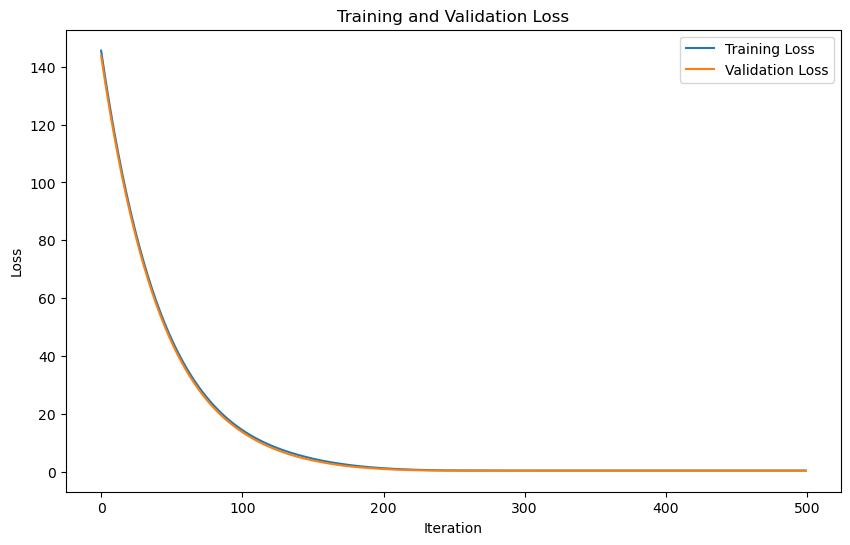

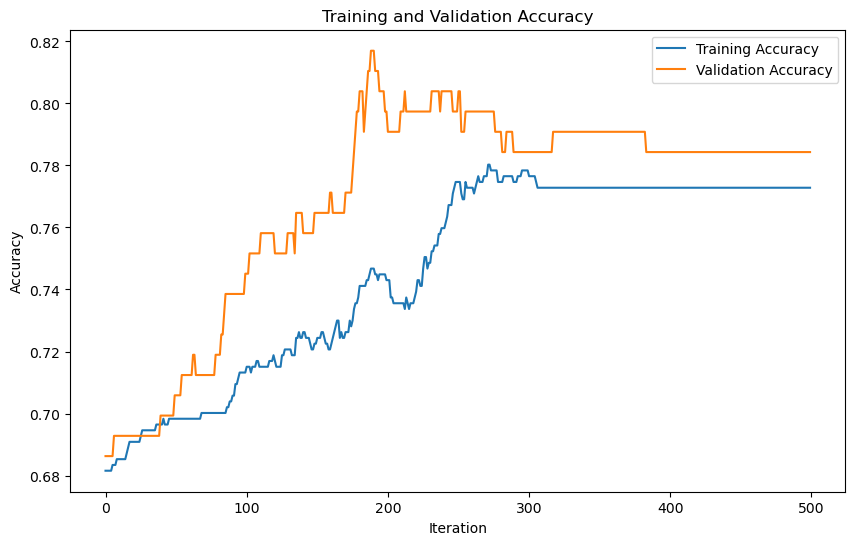

confusion matrix is:  [[19, 12], [3, 44]]
accuracy:  0.8076923076923077
precision:  0.8636363636363636
recall:  0.6129032258064516
F1 Score:  0.3584905660377358


In [5]:
#Using Ridge regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class RidgeLogistic:
    def __init__(self,learning_rate,iterations,l2_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penalty = l2_penalty
    def sigmoid(self,z):
        x = np.clip(z, -15, 15)
        return 1 / (1 + np.exp(-x))
    def ridge_loss(self,theta, X, y, penalty_strength):
        m = len(y)
        epsilon = 1e-15
        logits = np.dot(X, theta)
        predictions = self.sigmoid(logits)
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        reg_term = penalty_strength * np.sum(theta ** 2)  # Ridge penalty term
        return loss + reg_term
    def train(self, train_data, train_labels, val_data, val_labels):
        theta = np.random.rand(train_data.shape[1])*100
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0
            for i in range(len(train_data)):
                X_i = train_data[i:i+1]
                y_i = train_labels[i:i+1]
                
                logits = np.dot(X_i, theta)
                predictions = self.sigmoid(logits)
                gradient = np.dot(X_i.T, (predictions - y_i)) + 2 * self.l2_penalty * theta
                
                theta -= learning_rate * gradient
                total_loss += self.ridge_loss(theta,X_i,y_i,self.l2_penalty)
                if (predictions > 0.5 and y_i == 1) or (predictions <= 0.5 and y_i == 0):
                    correct_train += 1
            avg_loss = total_loss / num_train
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_train
            train_accuracies.append(train_accuracy)

            correct_val = 0
            val_loss = 0
            for i in range(num_val):
                xi = val_data[i:i+1]
                yi = val_labels[i:i+1]
                
                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                val_loss += self.ridge_loss(theta,xi,yi, self.l2_penalty)
                
                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1
            
            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)
            
            print(f"iteration {epoch + 1}, Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return theta, train_losses, val_losses, train_accuracies, val_accuracies
    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.sigmoid(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
theta = np.random.rand(standardized_X_bias.shape[1])*100
learning_rate = float(input("Learning rate: "))
iterations = 500
l2_penalty = 0.01
logridge = RidgeLogistic(learning_rate, iterations,l2_penalty)

# Training
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logridge.train(train_data, train_labels, val_data, val_labels)

# Display the learned parameters for L1 regularization
print("Learned Parameters (L1):", theta)
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_losses, label='Training Loss')
plt.plot(range(iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training accuracy vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logridge.test(test_data, test_labels, final_theta)
print('confusion matrix is: ',confusion_matrix)
print('accuracy: ',accuracy)
print('precision: ',precision)
print('recall: ',recall)
print('F1 Score: ',F1)

Iteration 1, Training Loss: 10.4107, Validation Loss: 9.2516, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
Iteration 2, Training Loss: 10.4045, Validation Loss: 9.2494, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
Iteration 3, Training Loss: 10.3984, Validation Loss: 9.2473, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
Iteration 4, Training Loss: 10.3920, Validation Loss: 9.2452, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
Iteration 5, Training Loss: 10.3846, Validation Loss: 9.2433, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
Iteration 6, Training Loss: 10.3774, Validation Loss: 9.2415, Train Accuracy: 0.6406, Validation Accuracy: 0.6797
Iteration 7, Training Loss: 10.3702, Validation Loss: 9.2397, Train Accuracy: 0.6406, Validation Accuracy: 0.6797
Iteration 8, Training Loss: 10.3631, Validation Loss: 9.2379, Train Accuracy: 0.6406, Validation Accuracy: 0.6797
Iteration 9, Training Loss: 10.3561, Validation Loss: 9.2362, Train Accuracy: 0.6406, Va

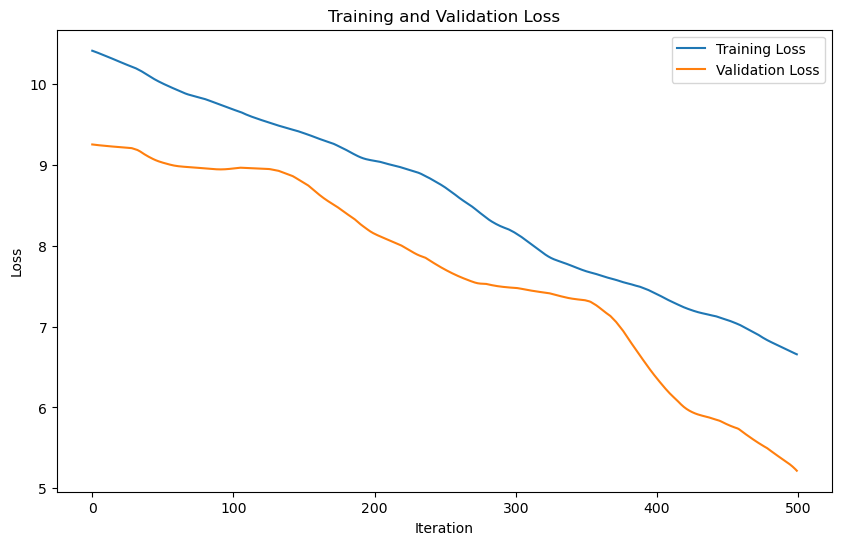

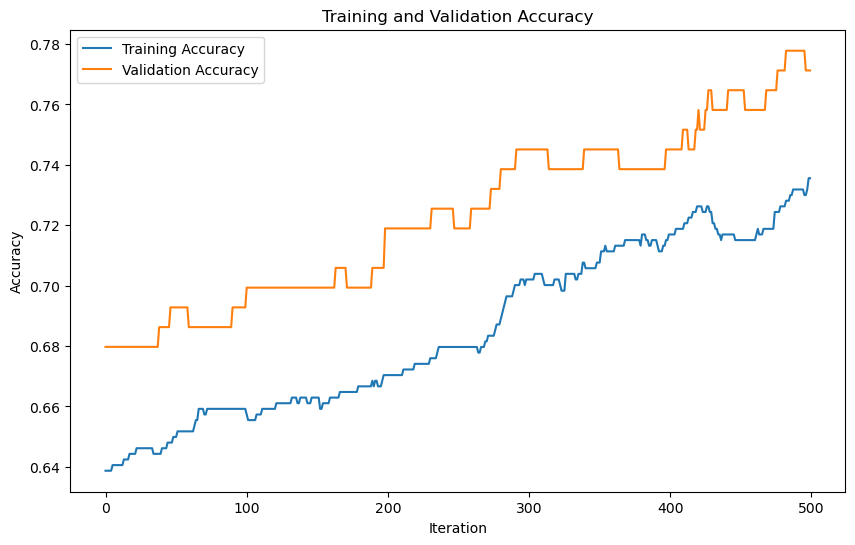

Confusion matrix: [[21, 10], [8, 39]]
Accuracy: 0.7692307692307693
Precision: 0.7241379310344828
Recall: 0.6774193548387096
F1 Score: 0.35


In [1]:
#Using tan hyperbolic function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    @staticmethod
    def tanh(z):
        x = np.clip(z, -15, 15)  # Clip inputs to a reasonable range
        b = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        return (1+b)/2 #adjusting the outputs between 0 and 1
    @staticmethod
    def cross_entropy_loss(y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    def train(self, train_data, train_labels, val_data, val_labels):
        num_samples, num_features_with_bias = train_data.shape
        theta = np.random.rand(num_features_with_bias)*100

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0

            for i in range(num_samples):
                xi = train_data[i]
                yi = train_labels[i]

                z = np.dot(xi, theta)
                pred = self.tanh(z)
                gradient = 2*(pred - yi) * xi

                theta -= self.learning_rate * gradient
                total_loss += self.cross_entropy_loss(yi, pred)

                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_train += 1

            avg_loss = total_loss / num_samples
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_samples
            train_accuracies.append(train_accuracy)

            # Evaluate the model on the validation set
            correct_val = 0
            val_loss = 0
            num_val = len(val_labels)
            for i in range(num_val):
                xi = val_data[i]
                yi = val_labels[i]

                z = np.dot(xi, theta)
                pred = self.tanh(z)
                val_loss += self.cross_entropy_loss(yi, pred)

                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1

            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)

            print(f"Iteration {epoch + 1}, Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                  f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        return theta, train_losses, val_losses, train_accuracies, val_accuracies

    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.tanh(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1


# Load the dataset
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
learning_rate = float(input("Learning rate: "))
iterations = 500

# Initialize the logistic regression model
logreg = LogisticRegression(learning_rate, iterations)

# Training
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logreg.train(train_data, train_labels, val_data, val_labels)

# Plot training loss vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_losses, label='Training Loss')
plt.plot(range(iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training accuracy vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Testing
test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logreg.test(test_data, test_labels, final_theta)

print('Confusion matrix:', confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', F1)


Iteration 1, Training Loss: 12.0112, Validation Loss: 10.2593, Train Accuracy: 0.6220, Validation Accuracy: 0.6928
Iteration 2, Training Loss: 12.0012, Validation Loss: 10.2549, Train Accuracy: 0.6220, Validation Accuracy: 0.6928
Iteration 3, Training Loss: 11.9902, Validation Loss: 10.2505, Train Accuracy: 0.6220, Validation Accuracy: 0.6928
Iteration 4, Training Loss: 11.9795, Validation Loss: 10.2462, Train Accuracy: 0.6220, Validation Accuracy: 0.6928
Iteration 5, Training Loss: 11.9690, Validation Loss: 10.2419, Train Accuracy: 0.6238, Validation Accuracy: 0.6928
Iteration 6, Training Loss: 11.9581, Validation Loss: 10.2376, Train Accuracy: 0.6238, Validation Accuracy: 0.6928
Iteration 7, Training Loss: 11.9470, Validation Loss: 10.2334, Train Accuracy: 0.6238, Validation Accuracy: 0.6928
Iteration 8, Training Loss: 11.9359, Validation Loss: 10.2291, Train Accuracy: 0.6238, Validation Accuracy: 0.6928
Iteration 9, Training Loss: 11.9253, Validation Loss: 10.2249, Train Accuracy: 0

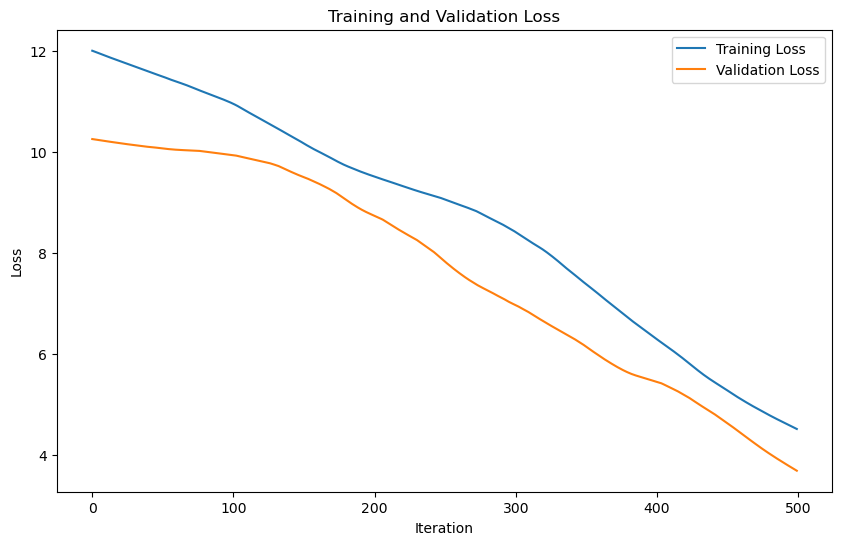

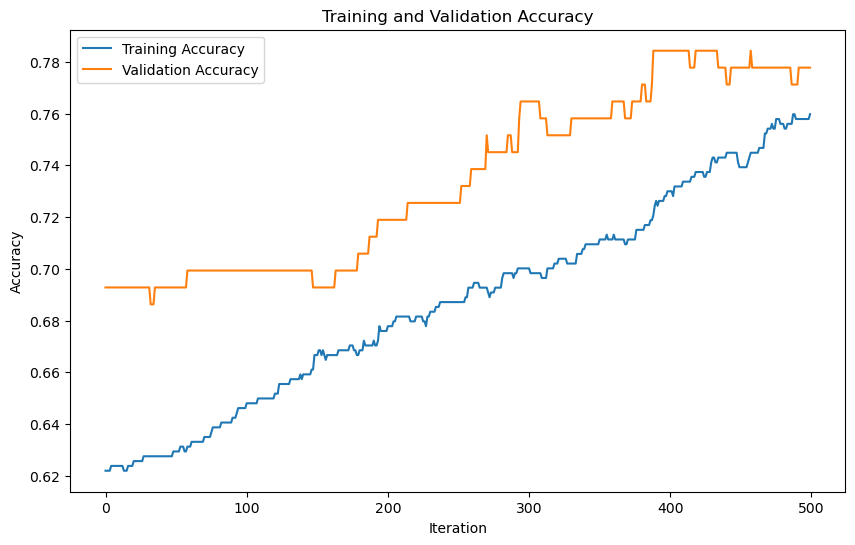

Confusion matrix: [[20, 11], [6, 41]]
Accuracy: 0.782051282051282
Precision: 0.7692307692307693
Recall: 0.6451612903225806
F1 Score: 0.3508771929824561
[-12.88028364  13.10416893  27.61501338  -7.38327845  12.3624814
 -13.25884899  10.69704915  15.40997238  -0.13807862]


In [9]:
#Logistic regression using mini batch gradient descent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    @staticmethod
    def sigmoid(z):
        x = np.clip(z, -15, 15)
        return 1 / (1 + np.exp(-x))
    @staticmethod
    def cross_entropy_loss(y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    def train(self, train_data, train_labels, val_data, val_labels):
        num_samples, num_features_with_bias = train_data.shape
        theta = np.random.rand(num_features_with_bias)*100

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        batchsize = int(input('Batch size: '))
        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0

            for i in range(0,num_samples, batchsize):
                xi = train_data[i:i+batchsize]
                yi = train_labels[i:i+batchsize]

                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                gradient = np.dot(xi.T, (pred - yi)) / batchsize
                theta -= self.learning_rate * gradient
                total_loss += self.cross_entropy_loss(yi, pred)
                correct_train += np.sum((pred > 0.5) == yi)

            avg_loss = total_loss / (num_samples // batchsize)
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_samples
            train_accuracies.append(train_accuracy)

            # Evaluate the model on the validation set
            correct_val = 0
            val_loss = 0
            num_val = len(val_labels)
            for i in range(num_val):
                xi = val_data[i]
                yi = val_labels[i]

                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                val_loss += self.cross_entropy_loss(yi, pred)

                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1

            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)

            print(f"Iteration {epoch + 1}, Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                  f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        return theta, train_losses, val_losses, train_accuracies, val_accuracies

    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.sigmoid(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1


# Load the dataset
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
learning_rate = float(input("Learning rate: "))
iterations = 500

# Initialize the logistic regression model
logreg = LogisticRegression(learning_rate, iterations)

# Training
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logreg.train(train_data, train_labels, val_data, val_labels)

# Plot training loss vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_losses, label='Training Loss')
plt.plot(range(iterations), val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training accuracy vs. iteration
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Testing
test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logreg.test(test_data, test_labels, final_theta)

print('Confusion matrix:', confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', F1)
print(final_theta)

iteration 1, Loss: 6.1684, Validation Loss: 5.6746, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 2, Loss: 6.1655, Validation Loss: 5.6722, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 3, Loss: 6.1627, Validation Loss: 5.6697, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 4, Loss: 6.1598, Validation Loss: 5.6659, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 5, Loss: 6.1569, Validation Loss: 5.6619, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 6, Loss: 6.1541, Validation Loss: 5.6579, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 7, Loss: 6.1513, Validation Loss: 5.6539, Train Accuracy: 0.6145, Validation Accuracy: 0.6471
iteration 8, Loss: 6.1484, Validation Loss: 5.6501, Train Accuracy: 0.6145, Validation Accuracy: 0.6536
iteration 9, Loss: 6.1455, Validation Loss: 5.6463, Train Accuracy: 0.6145, Validation Accuracy: 0.6536
iteration 10, Loss: 6.1425, Validation Loss: 5.6426, Train Accur

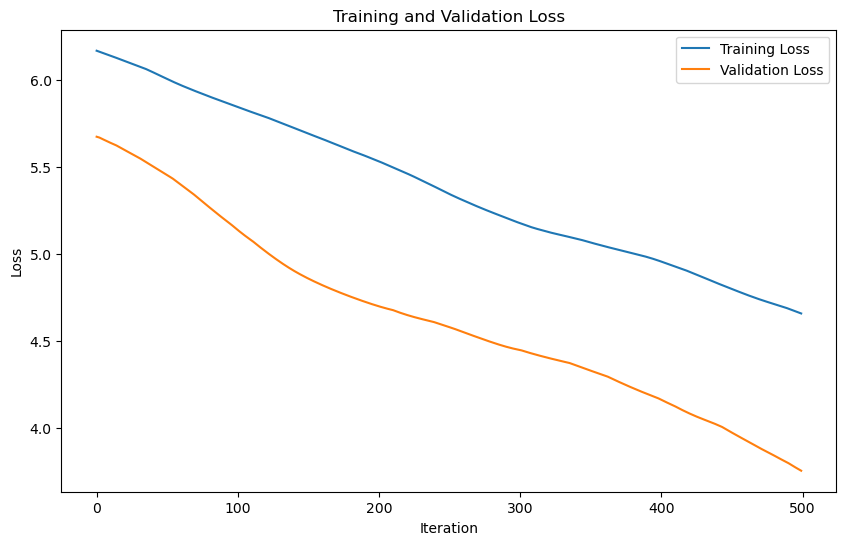

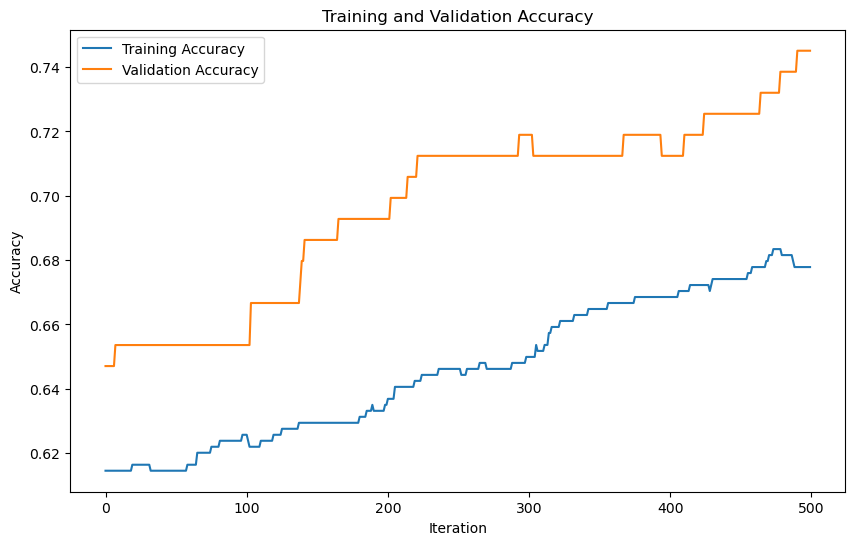

iteration 1, Loss: 10.8557, Validation Loss: 10.4240, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 2, Loss: 10.8489, Validation Loss: 10.4148, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 3, Loss: 10.8420, Validation Loss: 10.4057, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 4, Loss: 10.8352, Validation Loss: 10.3966, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 5, Loss: 10.8284, Validation Loss: 10.3876, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 6, Loss: 10.8216, Validation Loss: 10.3786, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 7, Loss: 10.8148, Validation Loss: 10.3694, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 8, Loss: 10.8080, Validation Loss: 10.3601, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 9, Loss: 10.8012, Validation Loss: 10.3509, Train Accuracy: 0.6089, Validation Accuracy: 0.6275
iteration 10, Loss: 10.7945, Validation Loss: 

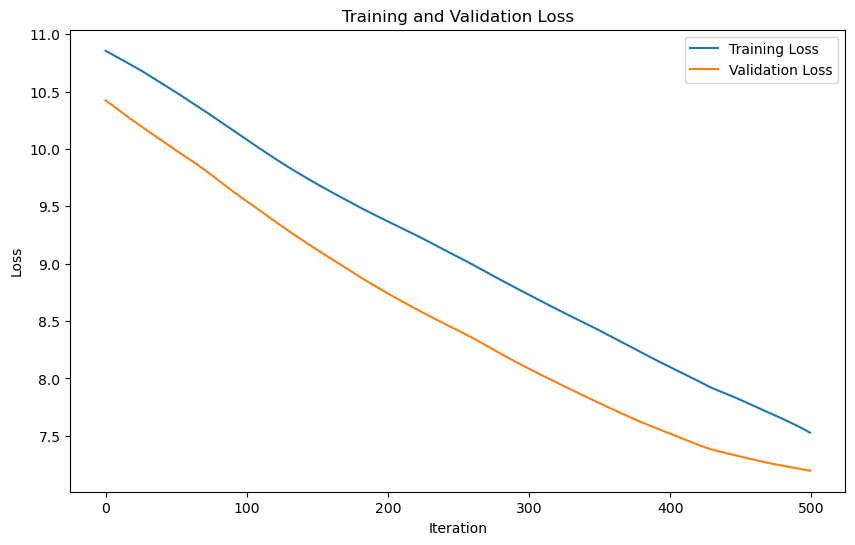

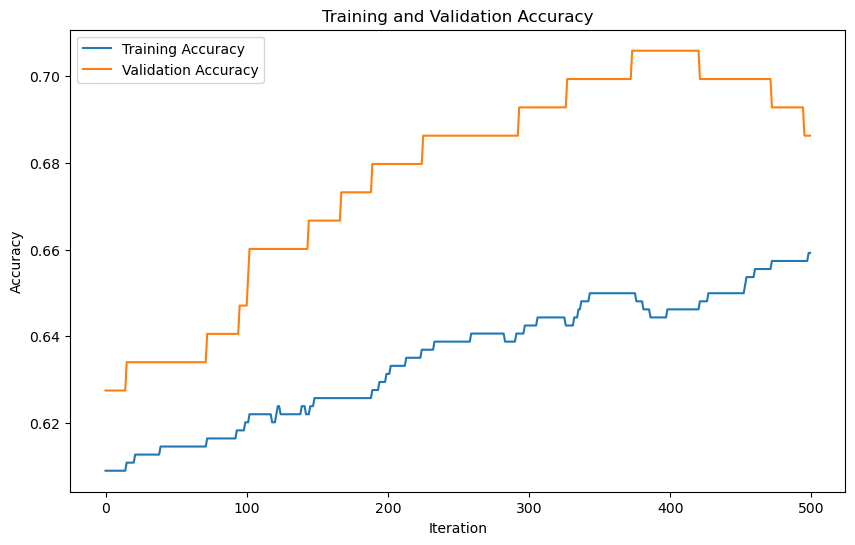

iteration 1, Loss: 61.7116, Validation Loss: 61.3854, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 2, Loss: 61.6138, Validation Loss: 61.2885, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 3, Loss: 61.5159, Validation Loss: 61.1917, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 4, Loss: 61.4181, Validation Loss: 61.0948, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 5, Loss: 61.3201, Validation Loss: 60.9980, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 6, Loss: 61.2221, Validation Loss: 60.9013, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 7, Loss: 61.1241, Validation Loss: 60.8046, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 8, Loss: 61.0261, Validation Loss: 60.7080, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 9, Loss: 60.9281, Validation Loss: 60.6114, Train Accuracy: 0.6685, Validation Accuracy: 0.6928
iteration 10, Loss: 60.8302, Validation Loss: 

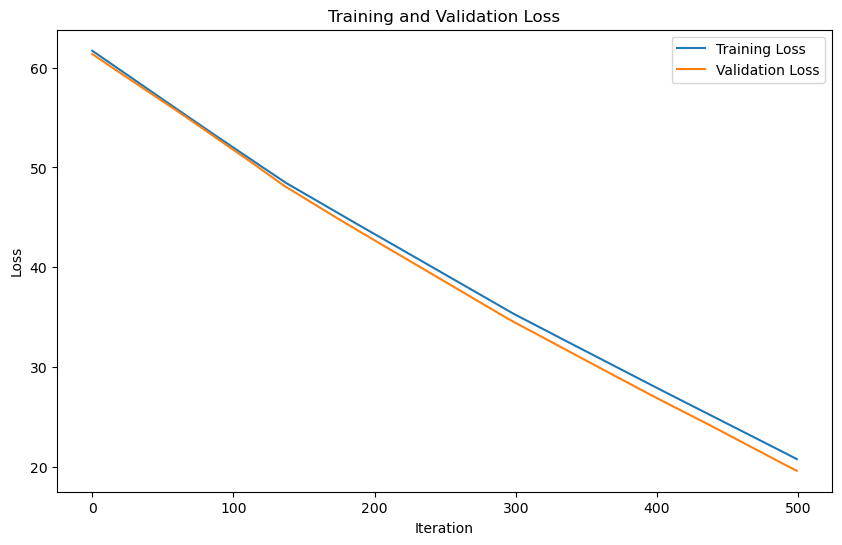

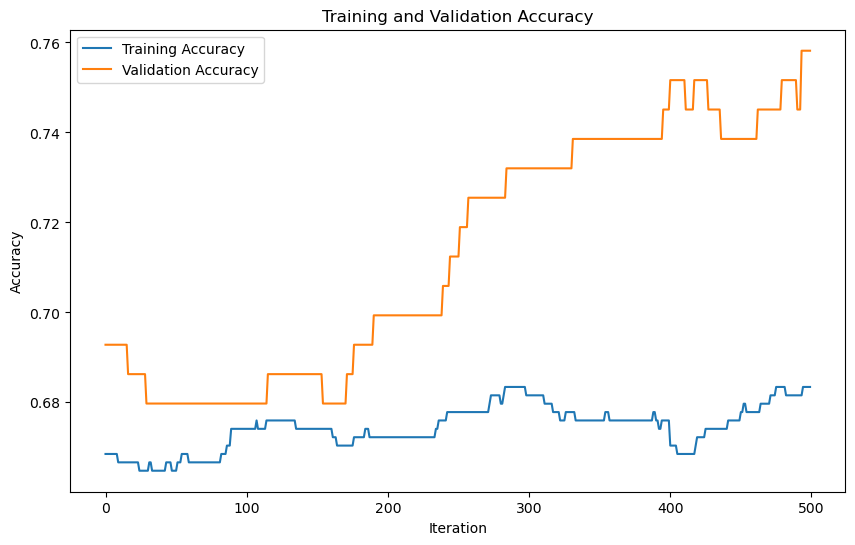

iteration 1, Loss: 666.1035, Validation Loss: 663.1696, Train Accuracy: 0.6127, Validation Accuracy: 0.6209
iteration 2, Loss: 660.7695, Validation Loss: 657.8407, Train Accuracy: 0.6127, Validation Accuracy: 0.6209
iteration 3, Loss: 655.4358, Validation Loss: 652.5122, Train Accuracy: 0.6127, Validation Accuracy: 0.6209
iteration 4, Loss: 650.1020, Validation Loss: 647.1842, Train Accuracy: 0.6127, Validation Accuracy: 0.6209
iteration 5, Loss: 644.7673, Validation Loss: 641.8566, Train Accuracy: 0.6127, Validation Accuracy: 0.6275
iteration 6, Loss: 639.4302, Validation Loss: 636.5277, Train Accuracy: 0.6108, Validation Accuracy: 0.6275
iteration 7, Loss: 634.0937, Validation Loss: 631.1994, Train Accuracy: 0.6108, Validation Accuracy: 0.6275
iteration 8, Loss: 628.7577, Validation Loss: 625.8715, Train Accuracy: 0.6108, Validation Accuracy: 0.6275
iteration 9, Loss: 623.4222, Validation Loss: 620.5443, Train Accuracy: 0.6108, Validation Accuracy: 0.6275
iteration 10, Loss: 618.0875

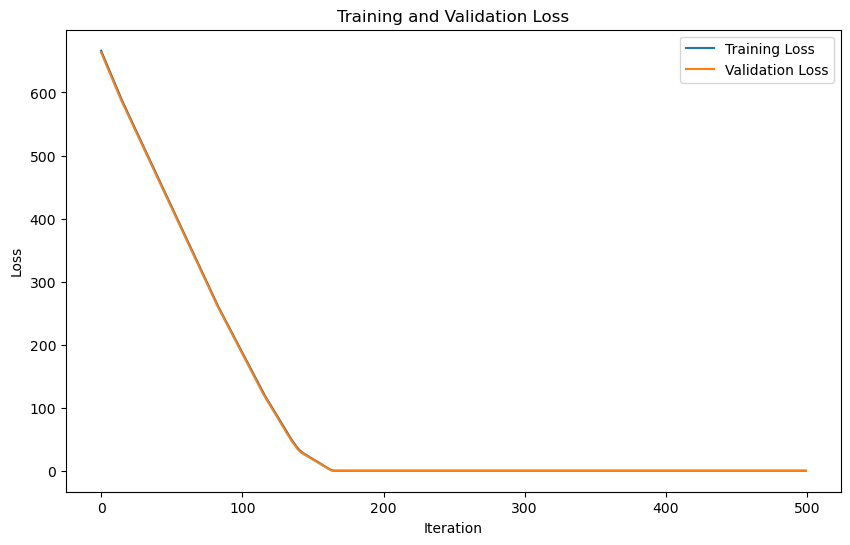

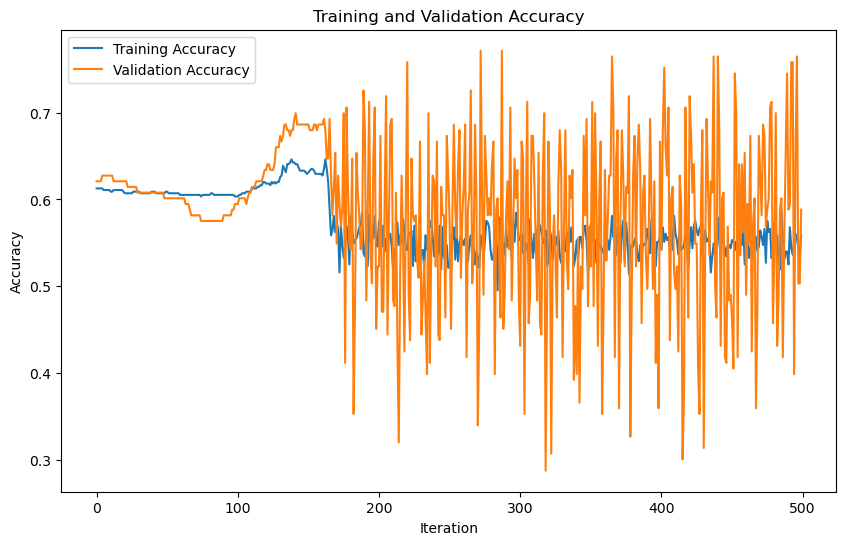

iteration 1, Loss: 5684.5234, Validation Loss: 5441.0341, Train Accuracy: 0.5922, Validation Accuracy: 0.5817
iteration 2, Loss: 5197.4748, Validation Loss: 4963.6655, Train Accuracy: 0.5940, Validation Accuracy: 0.5686
iteration 3, Loss: 4745.7607, Validation Loss: 4528.8411, Train Accuracy: 0.5922, Validation Accuracy: 0.5686
iteration 4, Loss: 4310.8397, Validation Loss: 4093.8697, Train Accuracy: 0.5959, Validation Accuracy: 0.5686
iteration 5, Loss: 3875.9481, Validation Loss: 3659.0091, Train Accuracy: 0.5922, Validation Accuracy: 0.5752
iteration 6, Loss: 3441.1036, Validation Loss: 3224.2438, Train Accuracy: 0.5866, Validation Accuracy: 0.5752
iteration 7, Loss: 3006.3109, Validation Loss: 2789.3920, Train Accuracy: 0.5810, Validation Accuracy: 0.5752
iteration 8, Loss: 2571.5876, Validation Loss: 2354.6649, Train Accuracy: 0.5791, Validation Accuracy: 0.5752
iteration 9, Loss: 2136.8834, Validation Loss: 1920.1293, Train Accuracy: 0.5736, Validation Accuracy: 0.5752
iteration 

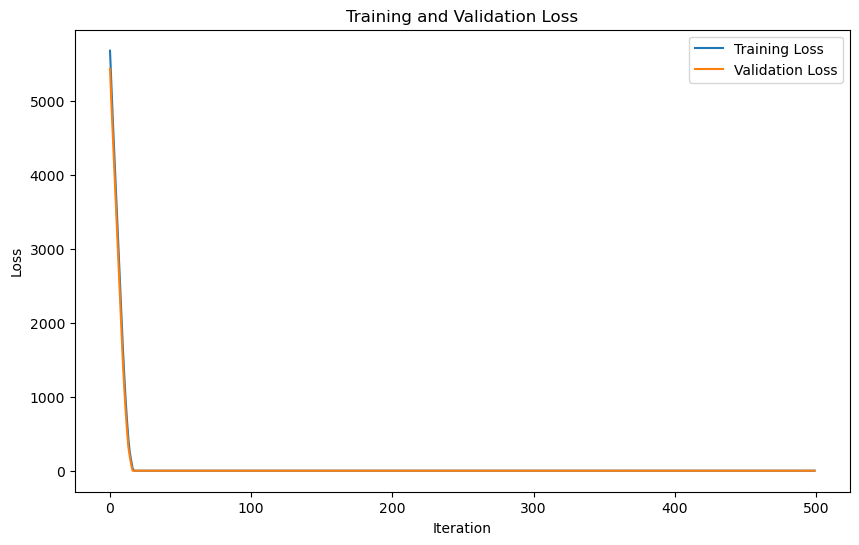

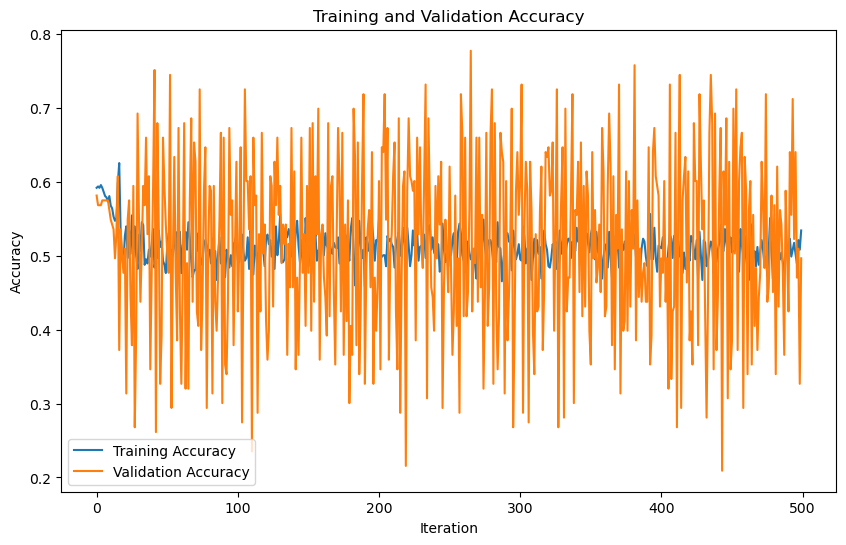

iteration 1, Loss: 52.7791, Validation Loss: 52.8525, Train Accuracy: 0.6127, Validation Accuracy: 0.6078
iteration 2, Loss: 52.6810, Validation Loss: 52.7541, Train Accuracy: 0.6127, Validation Accuracy: 0.6078
iteration 3, Loss: 52.5829, Validation Loss: 52.6558, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 4, Loss: 52.4848, Validation Loss: 52.5575, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 5, Loss: 52.3867, Validation Loss: 52.4594, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 6, Loss: 52.2887, Validation Loss: 52.3612, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 7, Loss: 52.1906, Validation Loss: 52.2631, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 8, Loss: 52.0926, Validation Loss: 52.1651, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 9, Loss: 51.9946, Validation Loss: 52.0671, Train Accuracy: 0.6127, Validation Accuracy: 0.6144
iteration 10, Loss: 51.8967, Validation Loss: 

In [7]:
#Using lasso regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class LassoLogistic:
    def __init__(self,learning_rate,iterations,l1_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty
    def sigmoid(self,z):
        x = np.clip(z, -15, 15)
        return 1 / (1 + np.exp(-x))
    def lasso_loss(self,theta, X, y, penalty_strength):
        m = len(y)
        epsilon = 1e-15
        logits = np.dot(X, theta)
        predictions = self.sigmoid(logits)
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        lasso_term = penalty_strength * np.sum(abs(theta))  # lasso penalty term
        return loss + lasso_term
    def train(self, train_data, train_labels, val_data, val_labels):
        theta = np.random.rand(train_data.shape[1])*100
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0
            for i in range(len(train_data)):
                X_i = train_data[i:i+1]
                y_i = train_labels[i:i+1]
                
                logits = np.dot(X_i, theta)
                predictions = self.sigmoid(logits)
                gradient = np.dot(X_i.T, (predictions - y_i)) + self.l1_penalty * np.sign(theta)
                
                theta -= learning_rate * gradient
                total_loss += self.lasso_loss(theta,X_i,y_i,self.l1_penalty)
                if (predictions > 0.5 and y_i == 1) or (predictions <= 0.5 and y_i == 0):
                    correct_train += 1
            avg_loss = total_loss / num_train
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_train
            train_accuracies.append(train_accuracy)

            correct_val = 0
            val_loss = 0
            for i in range(num_val):
                xi = val_data[i:i+1]
                yi = val_labels[i:i+1]
                
                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                val_loss += self.lasso_loss(theta,xi,yi, self.l1_penalty)
                
                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1
            
            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)
            
            print(f"iteration {epoch + 1}, Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return theta, train_losses, val_losses, train_accuracies, val_accuracies
    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.sigmoid(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
theta = np.random.rand(standardized_X_bias.shape[1])*100
learning_rate = float(input("Learning rate: "))
iterations = 500
l1_penalty_values = [0.001, 0.01, 0.1, 1, 10]
best_l1_penalty = None
best_accuracy = 0
for l1_penalty in l1_penalty_values:
    logreg = LassoLogistic(learning_rate, iterations,l1_penalty)
    final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logreg.train(train_data, train_labels, val_data, val_labels)
    last_val_accuracy = val_accuracies[-1]
    if last_val_accuracy > best_accuracy:
        best_accuracy = last_val_accuracy
        best_l1_penalty = l1_penalty
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_losses, label='Training Loss')
    plt.plot(range(iterations), val_losses, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # Plot training accuracy vs. iteration
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
    plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

logreg = LassoLogistic(learning_rate, iterations, best_l1_penalty)
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logreg.train(train_data, train_labels, val_data, val_labels)
test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logreg.test(test_data, test_labels, final_theta)

print(f"Best l1_penalty: {best_l1_penalty}")
print('Confusion Matrix:', confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', F1)


iteration 1, Loss: 20.6668, Validation Loss: 19.9775, Train Accuracy: 0.6257, Validation Accuracy: 0.6732
iteration 2, Loss: 20.5887, Validation Loss: 19.8993, Train Accuracy: 0.6257, Validation Accuracy: 0.6732
iteration 3, Loss: 20.5109, Validation Loss: 19.8215, Train Accuracy: 0.6257, Validation Accuracy: 0.6732
iteration 4, Loss: 20.4332, Validation Loss: 19.7433, Train Accuracy: 0.6257, Validation Accuracy: 0.6732
iteration 5, Loss: 20.3558, Validation Loss: 19.6654, Train Accuracy: 0.6276, Validation Accuracy: 0.6732
iteration 6, Loss: 20.2786, Validation Loss: 19.5878, Train Accuracy: 0.6276, Validation Accuracy: 0.6732
iteration 7, Loss: 20.2018, Validation Loss: 19.5105, Train Accuracy: 0.6276, Validation Accuracy: 0.6732
iteration 8, Loss: 20.1253, Validation Loss: 19.4336, Train Accuracy: 0.6294, Validation Accuracy: 0.6732
iteration 9, Loss: 20.0491, Validation Loss: 19.3570, Train Accuracy: 0.6294, Validation Accuracy: 0.6732
iteration 10, Loss: 19.9733, Validation Loss: 

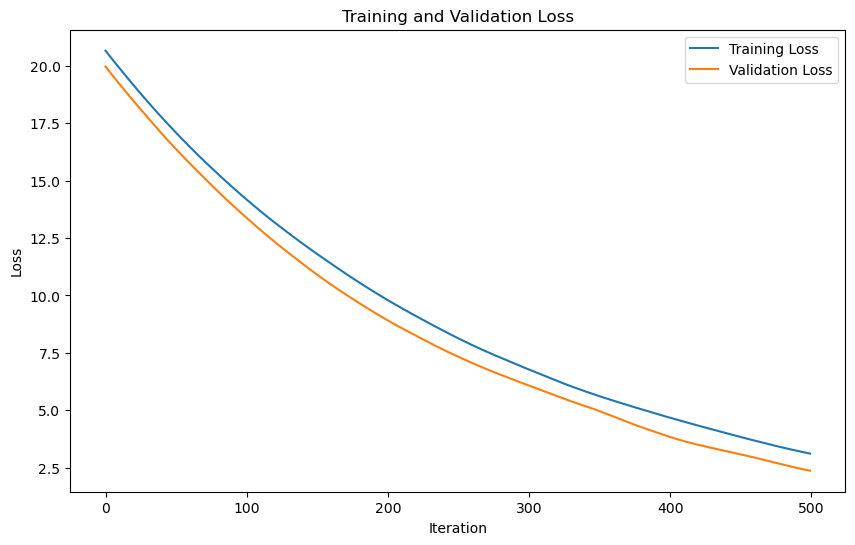

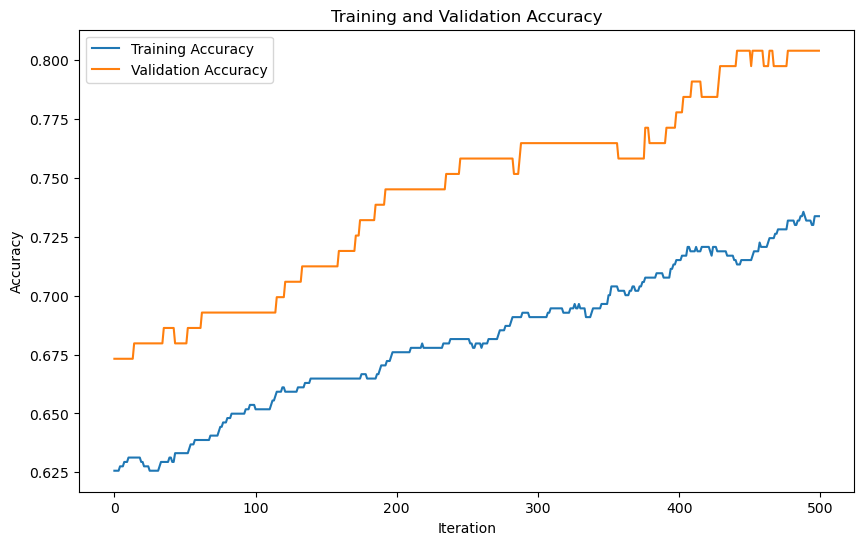

iteration 1, Loss: 364.1447, Validation Loss: 359.5807, Train Accuracy: 0.6574, Validation Accuracy: 0.6928
iteration 2, Loss: 355.9324, Validation Loss: 351.4607, Train Accuracy: 0.6574, Validation Accuracy: 0.6928
iteration 3, Loss: 347.9013, Validation Loss: 343.5200, Train Accuracy: 0.6574, Validation Accuracy: 0.6928
iteration 4, Loss: 340.0475, Validation Loss: 335.7546, Train Accuracy: 0.6574, Validation Accuracy: 0.6928
iteration 5, Loss: 332.3672, Validation Loss: 328.1608, Train Accuracy: 0.6574, Validation Accuracy: 0.6928
iteration 6, Loss: 324.8566, Validation Loss: 320.7349, Train Accuracy: 0.6574, Validation Accuracy: 0.6928
iteration 7, Loss: 317.5120, Validation Loss: 313.4731, Train Accuracy: 0.6592, Validation Accuracy: 0.6928
iteration 8, Loss: 310.3298, Validation Loss: 306.3721, Train Accuracy: 0.6592, Validation Accuracy: 0.6928
iteration 9, Loss: 303.3066, Validation Loss: 299.4281, Train Accuracy: 0.6592, Validation Accuracy: 0.6993
iteration 10, Loss: 296.4389

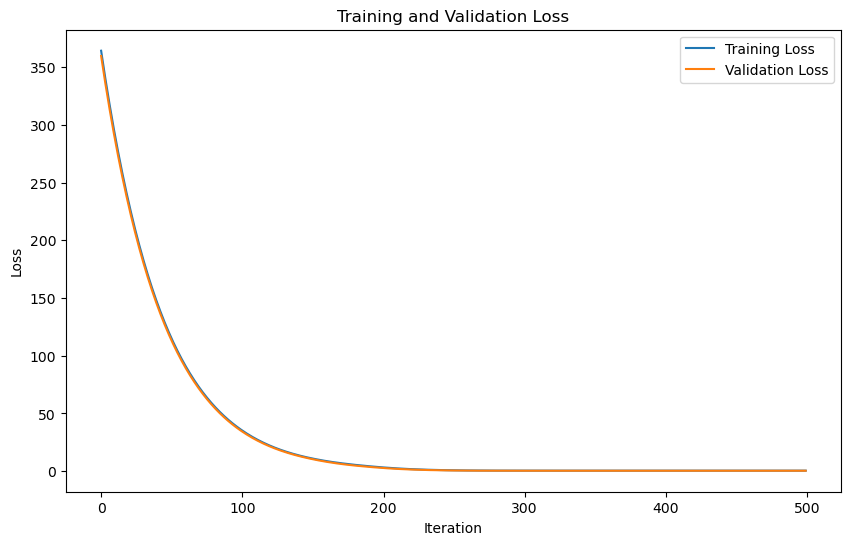

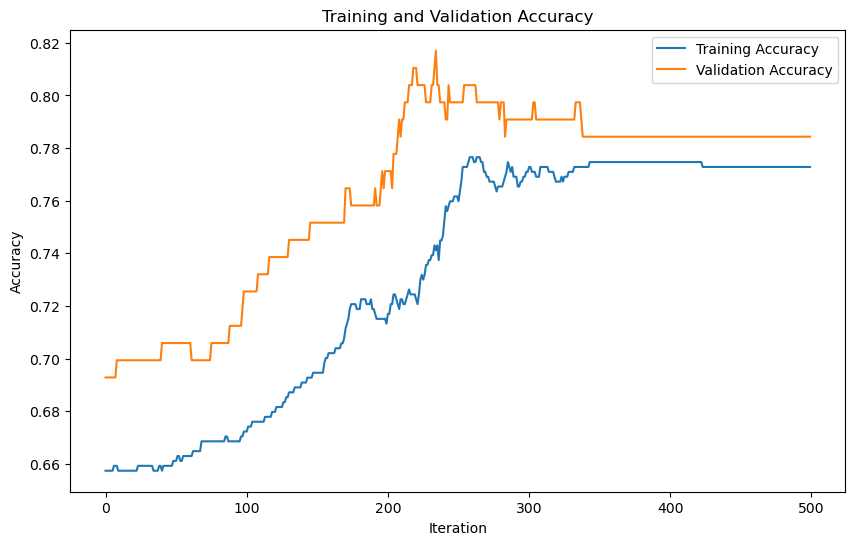

iteration 1, Loss: 2435.9888, Validation Loss: 2181.6889, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 2, Loss: 1961.9136, Validation Loss: 1756.8732, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 3, Loss: 1579.8993, Validation Loss: 1414.5703, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 4, Loss: 1272.1110, Validation Loss: 1138.7916, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 5, Loss: 1024.1497, Validation Loss: 916.6409, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
iteration 6, Loss: 824.4229, Validation Loss: 737.7165, Train Accuracy: 0.6387, Validation Accuracy: 0.6797
iteration 7, Loss: 663.5576, Validation Loss: 593.6297, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 8, Loss: 534.0308, Validation Loss: 477.6170, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 9, Loss: 429.7569, Validation Loss: 384.2309, Train Accuracy: 0.6369, Validation Accuracy: 0.6797
iteration 10, Loss:

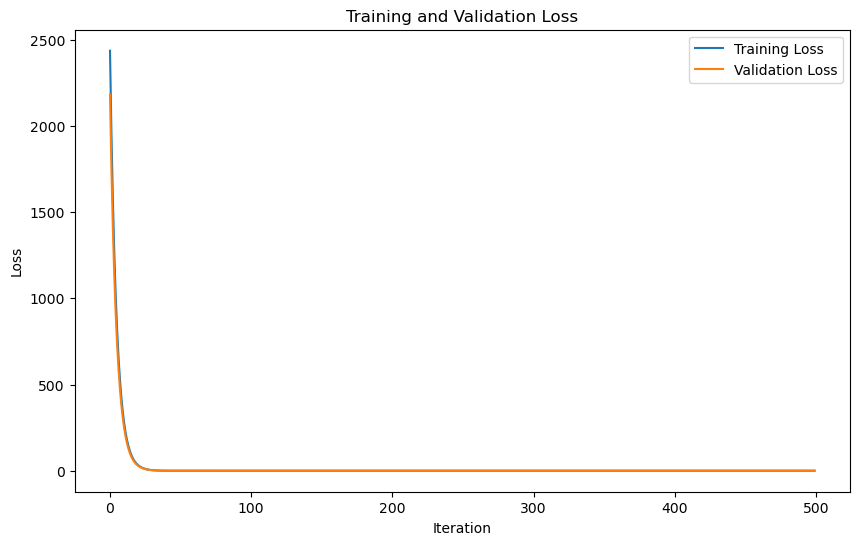

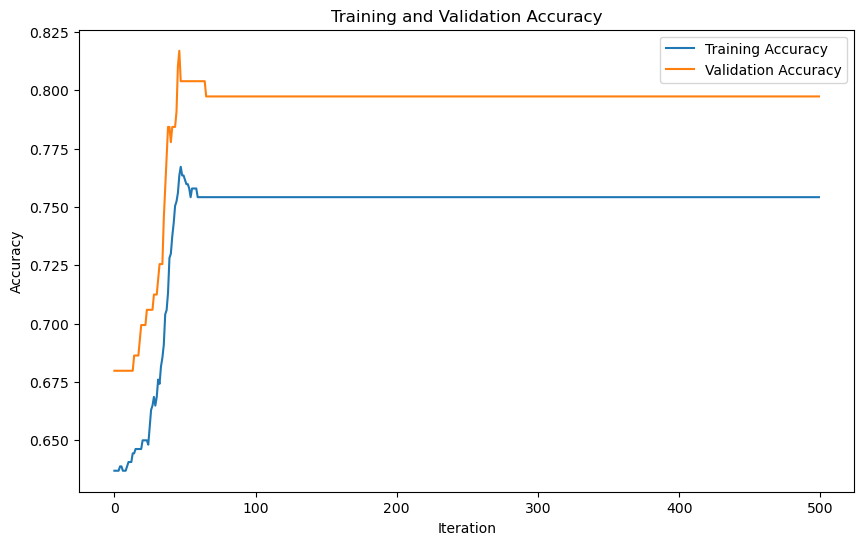

iteration 1, Loss: 9490.0005, Validation Loss: 2689.6353, Train Accuracy: 0.6257, Validation Accuracy: 0.6536
iteration 2, Loss: 1102.2017, Validation Loss: 312.6111, Train Accuracy: 0.6257, Validation Accuracy: 0.6536
iteration 3, Loss: 128.4534, Validation Loss: 36.6869, Train Accuracy: 0.6276, Validation Accuracy: 0.6601
iteration 4, Loss: 15.1636, Validation Loss: 4.5060, Train Accuracy: 0.6331, Validation Accuracy: 0.6667
iteration 5, Loss: 2.1358, Validation Loss: 0.9972, Train Accuracy: 0.6406, Validation Accuracy: 0.6863
iteration 6, Loss: 0.7888, Validation Loss: 0.6851, Train Accuracy: 0.6704, Validation Accuracy: 0.7320
iteration 7, Loss: 0.6747, Validation Loss: 0.6626, Train Accuracy: 0.7002, Validation Accuracy: 0.7908
iteration 8, Loss: 0.6663, Validation Loss: 0.6615, Train Accuracy: 0.7281, Validation Accuracy: 0.7974
iteration 9, Loss: 0.6659, Validation Loss: 0.6615, Train Accuracy: 0.7356, Validation Accuracy: 0.7974
iteration 10, Loss: 0.6659, Validation Loss: 0.66

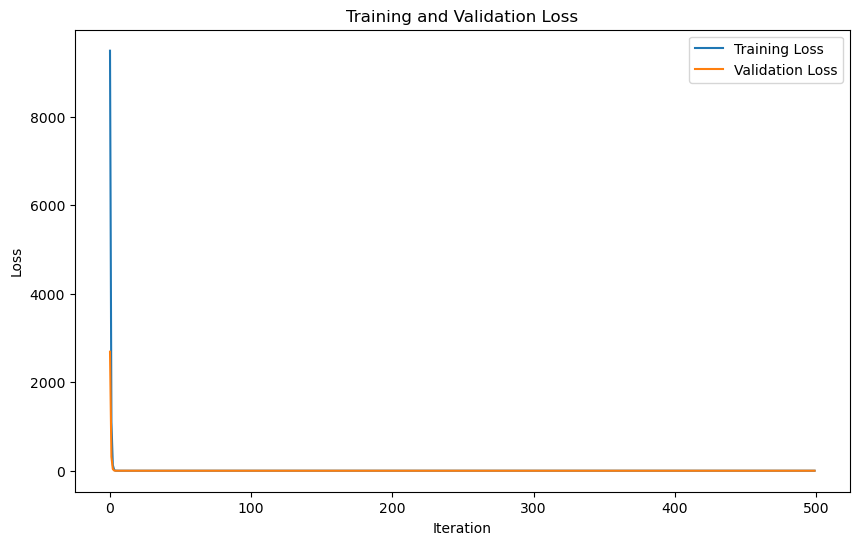

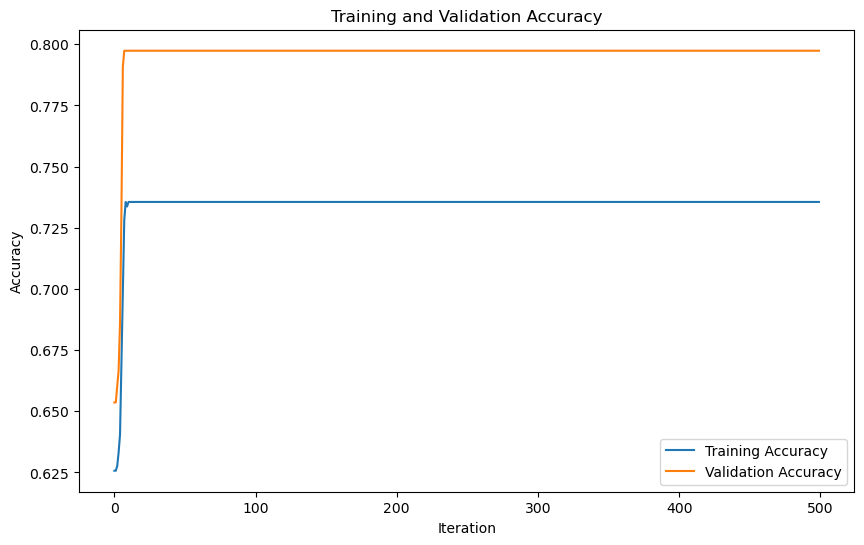

iteration 1, Loss: 16399.6195, Validation Loss: 0.6897, Train Accuracy: 0.6816, Validation Accuracy: 0.7778
iteration 2, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7244, Validation Accuracy: 0.7647
iteration 3, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 4, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 5, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 6, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 7, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 8, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 9, Loss: 0.6885, Validation Loss: 0.6898, Train Accuracy: 0.7225, Validation Accuracy: 0.7647
iteration 10, Loss: 0.6885, Validation Loss: 0.6898, Train A

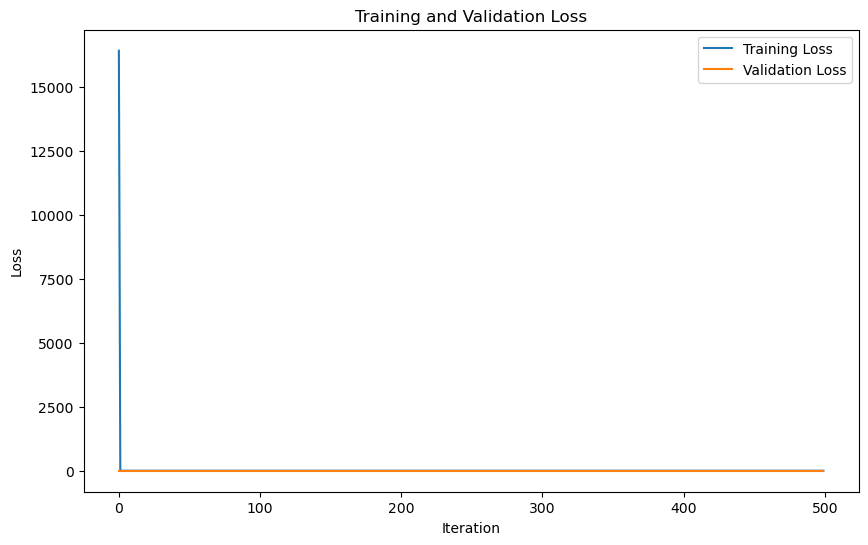

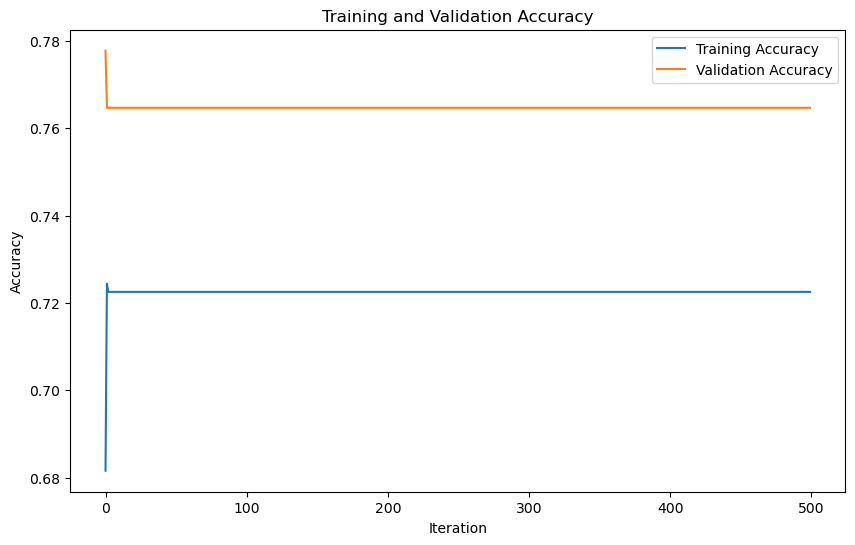

iteration 1, Loss: 23.8613, Validation Loss: 23.7083, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 2, Loss: 23.7759, Validation Loss: 23.6226, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 3, Loss: 23.6907, Validation Loss: 23.5372, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 4, Loss: 23.6059, Validation Loss: 23.4521, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 5, Loss: 23.5214, Validation Loss: 23.3673, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 6, Loss: 23.4372, Validation Loss: 23.2828, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 7, Loss: 23.3533, Validation Loss: 23.1986, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 8, Loss: 23.2696, Validation Loss: 23.1147, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 9, Loss: 23.1863, Validation Loss: 23.0311, Train Accuracy: 0.6518, Validation Accuracy: 0.6601
iteration 10, Loss: 23.1033, Validation Loss: 

In [6]:
#Using Ridge regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class RidgeLogistic:
    def __init__(self,learning_rate,iterations,l1_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty
    def sigmoid(self,z):
        x = np.clip(z, -15, 15)
        return 1 / (1 + np.exp(-x))
    def ridge_loss(self,theta, X, y, penalty_strength):
        m = len(y)
        epsilon = 1e-15
        logits = np.dot(X, theta)
        predictions = self.sigmoid(logits)
        predictions = np.clip(predictions, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        reg_term = penalty_strength * np.sum(theta ** 2)  # Ridge penalty term
        return loss + reg_term
    def train(self, train_data, train_labels, val_data, val_labels):
        theta = np.random.rand(train_data.shape[1])*100
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        for epoch in range(self.iterations):
            total_loss = 0
            correct_train = 0
            for i in range(len(train_data)):
                X_i = train_data[i:i+1]
                y_i = train_labels[i:i+1]
                
                logits = np.dot(X_i, theta)
                predictions = self.sigmoid(logits)
                gradient = np.dot(X_i.T, (predictions - y_i)) + 2 * self.l1_penalty * theta
                
                theta -= learning_rate * gradient
                total_loss += self.ridge_loss(theta,X_i,y_i,self.l1_penalty)
                if (predictions > 0.5 and y_i == 1) or (predictions <= 0.5 and y_i == 0):
                    correct_train += 1
            avg_loss = total_loss / num_train
            train_losses.append(avg_loss)
            train_accuracy = correct_train / num_train
            train_accuracies.append(train_accuracy)

            correct_val = 0
            val_loss = 0
            for i in range(num_val):
                xi = val_data[i:i+1]
                yi = val_labels[i:i+1]
                
                z = np.dot(xi, theta)
                pred = self.sigmoid(z)
                val_loss += self.ridge_loss(theta,xi,yi, self.l1_penalty)
                
                if (pred > 0.5 and yi == 1) or (pred <= 0.5 and yi == 0):
                    correct_val += 1
            
            avg_val_loss = val_loss / num_val
            val_losses.append(avg_val_loss)
            val_accuracy = correct_val / num_val
            val_accuracies.append(val_accuracy)
            
            print(f"iteration {epoch + 1}, Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, "
                f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return theta, train_losses, val_losses, train_accuracies, val_accuracies
    def test(self, test_data, test_labels, theta):
        num_test_samples = len(test_labels)
        predicted_labels = []

        for i in range(num_test_samples):
            xi = test_data[i]
            z = np.dot(xi, theta)
            pred = self.sigmoid(z)

            if pred > 0.5:
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        tp, tn, fp, fn = 0, 0, 0, 0
        for i in range(len(test_labels)):
            if predicted_labels[i] == 1 and test_labels[i] == 1:
                tp += 1
            elif predicted_labels[i] == 0 and test_labels[i] == 0:
                tn += 1
            elif predicted_labels[i] == 1 and test_labels[i] == 0:
                fp += 1
            else:
                fn += 1

        confusion_matrix = [[tp, fn], [fp, tn]]
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (precision * recall) / (precision + recall)

        return confusion_matrix, accuracy, precision, recall, F1
data = pd.read_csv('health care diabetes.csv').values
data = np.array(data)

# Separate data and labels
X = data[:, :-1]
y = data[:, -1]

# Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
standardized_X = (X - mean) / std
num_samples, num_features = X.shape

# Add a bias term to the input features
standardized_X_bias = np.c_[np.ones((num_samples, 1)), standardized_X]

# Split the data
num_train = int(0.7 * num_samples)
num_val = int(0.2 * num_samples)

train_data, train_labels = standardized_X_bias[:num_train], y[:num_train]
val_data, val_labels = standardized_X_bias[num_train:num_train + num_val], y[num_train:num_train + num_val]

# Hyperparameters
theta = np.random.rand(standardized_X_bias.shape[1])*100
learning_rate = float(input("Learning rate: "))
iterations = 500
l2_penalty_values = [0.001, 0.01, 0.1, 1, 10]
best_l2_penalty = None
best_accuracy = 0
for l2_penalty in l2_penalty_values:
    logridge = RidgeLogistic(learning_rate, iterations,l2_penalty)
    final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logridge.train(train_data, train_labels, val_data, val_labels)
    last_val_accuracy = val_accuracies[-1]
    if last_val_accuracy > best_accuracy:
        best_accuracy = last_val_accuracy
        best_l2_penalty = l2_penalty
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_losses, label='Training Loss')
    plt.plot(range(iterations), val_losses, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # Plot training accuracy vs. iteration
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), train_accuracies, label='Training Accuracy')
    plt.plot(range(iterations), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

logridge = RidgeLogistic(learning_rate, iterations, best_l2_penalty)
final_theta, train_losses, val_losses, train_accuracies, val_accuracies = logridge.train(train_data, train_labels, val_data, val_labels)
test_data, test_labels = standardized_X_bias[num_train + num_val:], y[num_train + num_val:]
confusion_matrix, accuracy, precision, recall, F1 = logridge.test(test_data, test_labels, final_theta)
print(f"Best l2_penalty: {best_l2_penalty}")
print('confusion matrix is: ',confusion_matrix)
print('accuracy: ',accuracy)
print('precision: ',precision)
print('recall: ',recall)
print('F1 Score: ',F1)